In [3]:
import pandas as pd
import numpy as np

import os, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import StandardScaler

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data = pd.read_csv("datasets/life_expectancy_data.csv")
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
798,Ecuador,2003,Developing,74.4,151.0,8,3.69,18.261833,82.0,0,...,97.0,6.46,87.0,0.3,244.46898,1328961.0,1.5,1.4,0.679,12.6
1834,Netherlands,2010,Developed,88.0,64.0,1,9.33,1035.621437,NaN,15,...,97.0,1.48,97.0,0.1,5338.25483,16615394.0,1.0,0.9,0.906,17.0
1214,Indonesia,2003,Developing,66.9,189.0,173,0.05,8.460156,64.0,24457,...,8.0,2.53,71.0,0.1,164.59447,22545214.0,1.9,11.0,0.613,10.8
940,France,2005,Developing,81.0,93.0,3,12.20,5451.701225,35.0,36,...,98.0,1.60,98.0,0.1,34879.72633,63179356.0,0.6,0.6,0.860,15.5
2863,Venezuela (Bolivarian Republic of),2010,Developing,73.7,158.0,9,7.22,0.000000,78.0,0,...,74.0,5.40,78.0,0.1,NaN,NaN,1.6,1.5,0.754,14.0


In [5]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
data = data.dropna()
data.shape

(1649, 22)

In [7]:
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2640,Tonga,2008,Developing,72.6,145.0,0,1.10,569.625504,84.0,0,...,88.0,5.13,86.0,0.1,3392.647430,135.0,0.1,0.1,0.698,14.5
2817,Uruguay,2008,Developing,76.4,119.0,1,6.76,24.731423,94.0,0,...,94.0,8.17,94.0,0.1,962.312164,335824.0,1.6,1.5,0.770,15.7
2052,Poland,2002,Developed,74.5,145.0,3,8.02,516.055439,98.0,34,...,98.0,6.32,99.0,0.1,5196.932921,3823364.0,2.5,2.6,0.790,15.0
755,Djibouti,2013,Developing,62.7,256.0,1,0.53,229.441010,82.0,28,...,82.0,9.14,82.0,2.1,1622.637974,896688.0,5.6,5.4,0.464,6.3
2818,Uruguay,2007,Developing,75.4,124.0,1,6.67,14.473059,94.0,0,...,94.0,8.23,94.0,0.1,79.697460,3339741.0,1.6,1.5,0.760,15.3


In [8]:
data["Status"].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

In [9]:
data["Country"].value_counts()

Afghanistan          16
Albania              16
Kiribati             15
Mexico               15
Mauritius            15
                     ..
Ireland               5
Sweden                4
Netherlands           4
Haiti                 2
Equatorial Guinea     1
Name: Country, Length: 133, dtype: int64

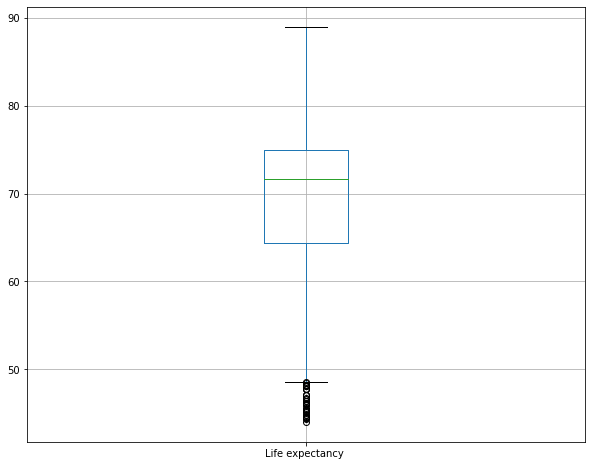

In [10]:
plt.figure(figsize=(10, 8))
data.boxplot('Life expectancy ')
plt.show()

d:\development\softwares\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


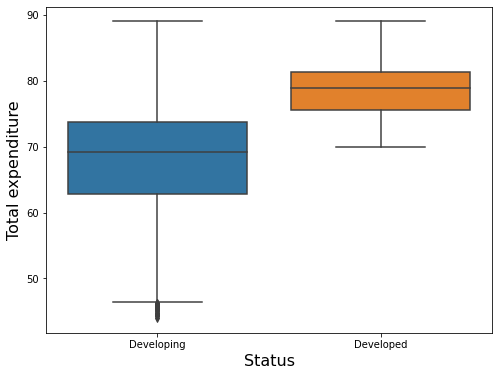

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot('Status', 'Life expectancy ', data=data)
plt.xlabel('Status', fontsize=16)
plt.ylabel('Total expenditure', fontsize=16)
plt.show()

In [12]:
data_corr = data[['Life expectancy ', 'Adult Mortality', 'Schooling', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population']].corr()
data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.702523,0.727630,0.174718,0.341331,0.441322,-0.022305
Adult Mortality,-0.702523,1.000000,-0.421171,-0.085227,-0.191429,-0.255035,-0.015012
Schooling,0.727630,-0.421171,1.000000,0.243783,0.350398,0.467947,-0.040312
Total expenditure,0.174718,-0.085227,0.243783,1.000000,0.129915,0.180373,-0.079962
Diphtheria,0.341331,-0.191429,0.350398,0.129915,1.000000,0.158438,-0.039898
GDP,0.441322,-0.255035,0.467947,0.180373,0.158438,1.000000,-0.020369
Population,-0.022305,-0.015012,-0.040312,-0.079962,-0.039898,-0.020369,1.000000


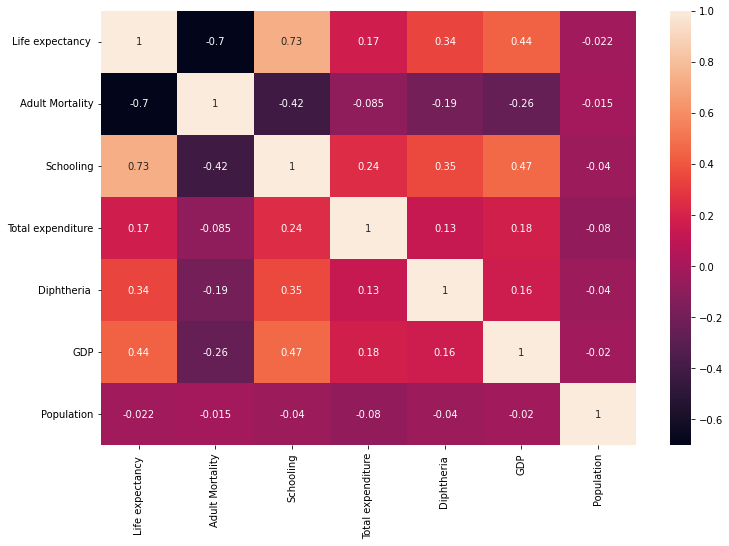

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data_corr, annot=True)
plt.show()

In [14]:
features = data.drop('Life expectancy ', axis=1)
target = data[['Life expectancy ']]
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [15]:
target.sample(5)

,Life expectancy
1944,66.0
832,68.9
799,73.6
2448,72.3
141,78.7


In [16]:
features = features.drop('Country', axis=1)
features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [17]:
categorical_features = features['Status'].copy()
categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [18]:
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [19]:
numeric_features = features.drop(['Status'], axis = 1)
numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [20]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03
Polio,1649.0,8.356458e+01,2.245056e+01,3.00000,81.000000,9.300000e+01,9.700000e+01,9.900000e+01


In [21]:
standardScalar = StandardScaler()

numeric_features = pd.DataFrame(standardScalar.fit_transform(numeric_features), columns=numeric_features.columns, index=numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,-7.962905e-15,1.000303,-1.918650,-0.695101,0.039029,0.773159,1.751998
Adult Mortality,1649.0,-7.756076e-17,1.000303,-1.334813,-0.728135,-0.161371,0.469255,4.428626
infant deaths,1649.0,-4.308931e-18,1.000303,-0.269455,-0.261178,-0.244623,-0.087352,12.974422
Alcohol,1649.0,6.894290e-17,1.000303,-1.122948,-0.924336,-0.184509,0.696829,3.311051
percentage expenditure,1649.0,2.585359e-17,1.000303,-0.397439,-0.376151,-0.314933,-0.107798,10.384044
Hepatitis B,1649.0,1.637394e-16,1.000303,-3.016682,-0.203841,0.382167,0.655638,0.772839
Measles,1649.0,-4.308931e-18,1.000303,-0.220624,-0.220624,-0.219136,-0.183630,12.815610
BMI,1649.0,-6.894290e-17,1.000303,-1.829459,-0.943305,0.282120,0.894832,1.973408
under-five deaths,1649.0,-2.585359e-17,1.000303,-0.271541,-0.265401,-0.246979,-0.093462,12.623872
Polio,1649.0,2.574586e-16,1.000303,-3.589622,-0.114267,0.420403,0.598626,0.687738


In [22]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)
processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.751998,0.756629,0.243745,-1.122948,-0.356909,-0.555446,-0.106171,-0.963560,0.238134,-3.455955,...,-0.887941,-0.312389,-0.434239,0.270913,2.685909,2.663654,-0.833462,-0.722799,0,1
1,1.507289,0.820490,0.260300,-1.122948,-0.355633,-0.672648,-0.171828,-0.988878,0.256557,-1.139051,...,-1.027006,-0.312389,-0.431760,-0.203382,2.751157,2.706643,-0.849853,-0.758583,0,1
2,1.262579,0.796542,0.276854,-1.122948,-0.355806,-0.594514,-0.177977,-1.014197,0.274979,-0.960828,...,-0.934296,-0.312389,-0.430100,0.242452,2.794656,2.749632,-0.882634,-0.794367,0,1
3,1.017869,0.828472,0.301687,-1.122948,-0.352983,-0.477312,0.055789,-1.039516,0.299541,-0.738049,...,-0.795231,-0.312389,-0.426769,-0.155548,2.838155,2.814116,-0.920878,-0.830151,0,1
4,0.773159,0.852420,0.318242,-1.122948,-0.393403,-0.438245,0.078203,-1.059771,0.324104,-0.693493,...,-0.748876,-0.312389,-0.479628,-0.165747,2.903403,2.857105,-0.970049,-0.937503,0,1


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=1)

In [24]:
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((1319, 21), (330, 21)), ((1319, 1), (330, 1)))

In [25]:
def build_single_layer_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, input_shape = (x_train.shape[1],),activation = 'sigmoid'))

    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

    model.compile(loss = 'mse', metrics=['mae', 'mse'], optimizer=optimizer)

    return model

In [26]:
model = build_single_layer_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# !pip install pydot
# !pip install pydotplus
# !pip install graphviz
#
# !pip3 install pydot-ng
# !pip3 install graphviz

# import keras.utils.vis_utils
# from importlib import reload
# reload(keras.utils.vis_utils)
#
#
# from keras.utils.vis_utils import plot_model
#
tf.keras.utils.plot_model(model)

In [41]:
num_epocsh = 100

training_history = model.fit(x_train, y_train, epochs = num_epocsh, validation_split=0.2, verbose=True)

Epoch 1/100
33/33 [==============================] - 0s 4ms/step - loss: 4124.1196 - mae: 63.7295 - mse: 4124.1196 - val_loss: 3632.6836 - val_mae: 59.7712 - val_mse: 3632.6836
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 3120.6802 - mae: 55.2783 - mse: 3120.6802 - val_loss: 2585.6169 - val_mae: 50.1889 - val_mse: 2585.6169
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 2081.5657 - mae: 44.8032 - mse: 2081.5657 - val_loss: 1606.9030 - val_mae: 39.2306 - val_mse: 1606.9030
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 1226.5785 - mae: 33.9768 - mse: 1226.5785 - val_loss: 890.8802 - val_mae: 28.7481 - val_mse: 890.8802
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 655.7150 - mae: 24.2352 - mse: 655.7150 - val_loss: 464.9297 - val_mae: 20.0984 - val_mse: 464.9297
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 333.5573 - mae: 16.6108 - mse: 333.5573 - val_lo

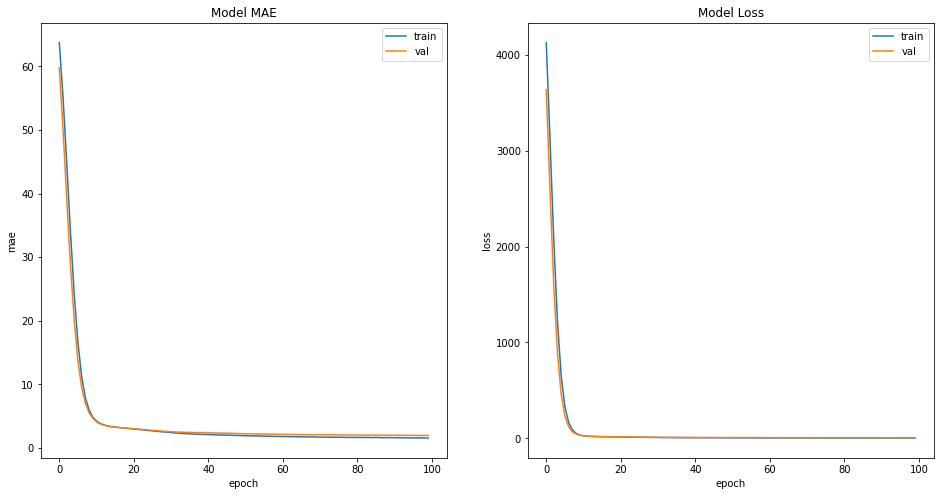

In [46]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2 ,1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [47]:
model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 5.0999 - mae: 1.6796 - mse: 5.0999


[5.099903106689453, 1.6795920133590698, 5.099903106689453]

In [48]:
y_pred = model.predict(x_test)

# How much of the variance is captured in the model. Higher the better
r2_score(y_test, y_pred)

0.9333747126547747

In [50]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten()}, index=range(len(y_pred)))

pred_results.sample(10)

,y_test,y_pred
310,88.0,82.119225
300,86.0,81.262085
213,58.6,58.926834
290,81.1,79.125847
38,63.3,62.214687
89,54.3,56.020264
105,69.5,71.515213
231,67.6,67.871872
186,77.0,70.089767
88,73.2,75.202888


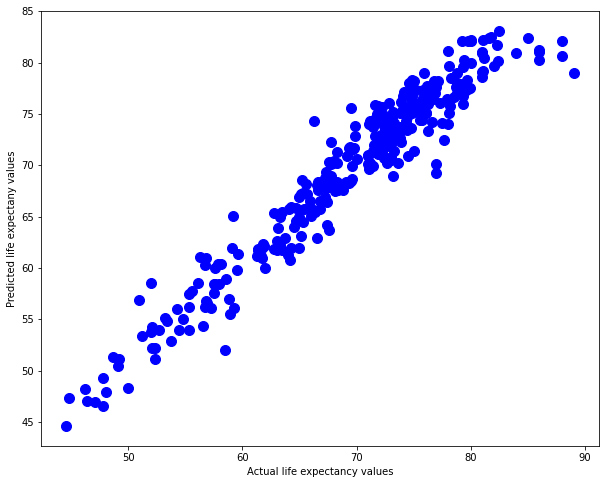

In [51]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=100, c='blue')

plt.xlabel('Actual life expectancy values')
plt.ylabel('Predicted life expectany values')
plt.show()

In [52]:
def build_multiple_layer_model():
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1], ), activation='relu'),
                              layers.Dense(16, activation='relu'),
                              layers.Dense(8, activation='relu'),
                              layers.Dense(1)
                              ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss = 'mse', metrics=['mae', 'mse'], optimizer = optimizer)

    return model


In [53]:
model = build_multiple_layer_model()
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [59]:
# !rm -rf seq_logs
# !ls -l

from tensorflow import keras

logdir = os.path.join("seq_logs", datetime.datetime.now().strftime("%Y$m%d-%H%M%S"))

tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [60]:
training_history = model.fit(x_train,
                             y_train,
                             validation_split=0.2,
                             epochs=500,
                             batch_size=100,
                             callbacks=[tensorboard_callback]
                             )

Epoch 1/500
11/11 [==============================] - 2s 69ms/step - loss: 4776.0366 - mae: 68.5520 - mse: 4776.0366 - val_loss: 4749.0103 - val_mae: 68.2748 - val_mse: 4749.0103
Epoch 2/500
11/11 [==============================] - 0s 23ms/step - loss: 4698.4321 - mae: 67.9845 - mse: 4698.4321 - val_loss: 4659.9004 - val_mae: 67.6195 - val_mse: 4659.9004
Epoch 3/500
11/11 [==============================] - 0s 26ms/step - loss: 4594.6846 - mae: 67.2166 - mse: 4594.6851 - val_loss: 4538.8306 - val_mae: 66.7214 - val_mse: 4538.8306
Epoch 4/500
11/11 [==============================] - 0s 29ms/step - loss: 4455.3164 - mae: 66.1696 - mse: 4455.3169 - val_loss: 4373.4692 - val_mae: 65.4757 - val_mse: 4373.4697
Epoch 5/500
11/11 [==============================] - 0s 25ms/step - loss: 4260.7314 - mae: 64.6793 - mse: 4260.7314 - val_loss: 4140.8174 - val_mae: 63.6791 - val_mse: 4140.8174
Epoch 6/500
11/11 [==============================] - 0s 19ms/step - loss: 3990.1042 - mae: 62.5367 - mse: 3990

In [61]:
%load_ext tensorboard

In [62]:
%tensorboard --logdir seq_logs --port 6050

Launching TensorBoard...

In [ ]:
#localhost:6050